<a href="https://colab.research.google.com/github/souhirbenamor/EPF/blob/main/Naive_model_Bridging_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [54]:
df = pd.read_excel('/content/electricty_real&Funda_data.xlsx')

df = df.set_index(pd.to_datetime(df['Date']))
df = df.set_index(df.Date)
df.drop(columns = 'Date', inplace = True)
df.drop(df.loc[df['price day ahead real'].isna()].index, inplace = True)
df.sort_index(inplace = True)

In [55]:
print(df)

                         price day ahead real  Estimated price       Lignite  \
Date                                                                           
2014-12-31 23:59:59.991                 18.29         25.390297   389.000000   
2015-01-01 00:59:59.991                 16.04         24.980000   389.000000   
2015-01-01 01:59:59.991                 14.60         24.796874   389.000000   
2015-01-01 02:59:59.991                 14.95         26.074430   389.000000   
2015-01-01 03:59:59.991                 14.50         20.377994   389.000000   
...                                       ...               ...          ...   
2020-12-31 18:59:59.980                 56.70         56.545811  4052.024327   
2020-12-31 19:59:59.980                 52.44         50.781170  4052.024327   
2020-12-31 20:59:59.980                 51.86         50.781170  4052.024327   
2020-12-31 21:59:59.980                 52.26         50.781170  4052.024327   
2020-12-31 22:59:59.980                 

The 'Dumb' Method is our baseline model. This method simply looks at the price now, and believes that 24 hours from now it will be the same price


In [56]:
df['pred_one_day'] = df['price day ahead real'].shift(+24)
df['difference_one_day'] = (df['pred_one_day'] - df['price day ahead real']).abs()

In [57]:
print(df['pred_one_day'])

Date
2014-12-31 23:59:59.991      NaN
2015-01-01 00:59:59.991      NaN
2015-01-01 01:59:59.991      NaN
2015-01-01 02:59:59.991      NaN
2015-01-01 03:59:59.991      NaN
                           ...  
2020-12-31 18:59:59.980    52.38
2020-12-31 19:59:59.980    46.88
2020-12-31 20:59:59.980    43.22
2020-12-31 21:59:59.980    37.43
2020-12-31 22:59:59.980    38.54
Name: pred_one_day, Length: 52608, dtype: float64


In [58]:
train_df = df[:-17664]
test_df = df[-17664:]

In [59]:
test_df['one_day_difference_percentage'] = ((test_df['difference_one_day']+1)/(test_df['price day ahead real']+1))*100

one_day_difference_percentage_average = test_df['one_day_difference_percentage'].mean()
one_day_difference_percentage_average

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


inf

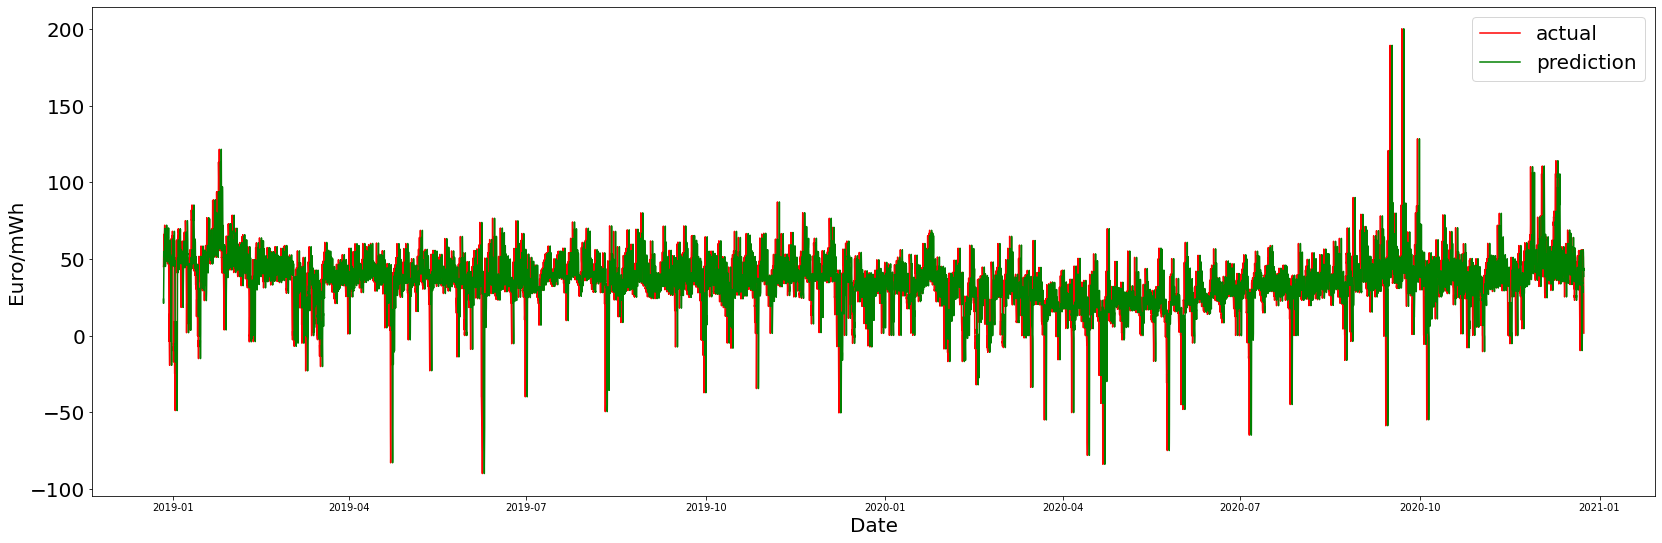

In [60]:
fig, ax = plt.subplots(figsize = (28,9))
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Euro/mWh', fontsize=20)
ax.plot(test_df['price day ahead real'][2:17472], label = 'actual', color = 'r')
ax.plot(test_df['pred_one_day'][2:17472], label = 'prediction', color = 'g')
ax.tick_params(axis='y', labelsize = 20)

ax.legend(prop={'size': 20})

In [61]:
# Save prediction Results
df_Prediction=df['pred_one_day']
import pandas as pd
import csv
pd.DataFrame(df_Prediction)
df_Prediction=pd.DataFrame(df_Prediction)
df_Prediction.to_csv("df_Prediction.csv", header=False, quoting=csv.QUOTE_NONE, escapechar=' ')